# Expt 5: Photometry of an Exoplanet Transit
by Joshua Lawton

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats

In this notebook, I aim to document and explain the various steps used to apply photometry to the transit event of HAT-P-29b occulting it's host star on the night of $5^{th} - 6^{th} December  2011$.  I also aim to use the computational power of this notebook to perform various calculations, plot graphs, and ultimately plot a light-curve of the transit to deduce various properties of the exoplanet. 

## Data inspection 
My first task is to make sure the images captured are actually of HAT-P-29. I do this by obtaining a finding chart from the AAVSO website, and comparing the images to this chart. I insert the chart and the image used to confirm HAT-P-29's existence below so the reader may see. Highlighted on the chart and image are the stars I used to confirm the presence and location of our star. I apologise for the size of the images, they are rather large!
![](findingchart.jpg)
![](chart_used_to_find_star.jpeg)

I then use the "slice" tool on gaia to obtain the Full Width Half Maximum (FWHM) of several bright stars in the frame, and load several images to check the consistency of the FWHM. Each star has been labelled on the above diagram. All FWHM provided are only estimates, in units of pixels:


| Star | FWHM Image 21-47-47 | FWHM Image 21-48-59 | FWHM Image 22-23-46 |
|-------------------------------| 
| HAT-P-29 | 4.0 | 4.0 | 5.5 |
|-------------------------------|  
| 1 | 3.75 | 3.6 | 3.8 |
|-------------------------------| 
| 2 | 3.7 | 4.0 | 4.0 |
|-------------------------------| 
| 3 | 3.5 | 2.8 | 4.1 |


Calculating the FWHM allows us to choose an appropriate aperture size for further analysis. The average FWHM was 4.0, so the radius of our central annulus should be 8.0 pixels, and our sky annulus is between 2 and 3.5, to ensure no neighbouring stars encroach inside the aperture.

For identification, in master.png, HAT-P-29 is the star labelled 12. Bare in mind the image has been flipped horizontally. Image is inserted here for the convinence of the reader. 
![](master.png) 

## The transit light curve 
We can now move on to formatting our data ready to plot our transit light-curve. In order to do this, we want to find the differential magnitude of our target star relative to the well-behaved comparison stars in our frame in order to find our flux ratios, i.e: $$ \Delta m_i = m_{target} - m_{comp(i)}$$ $$ \Delta m_i = -2.5 log (N_t / N_i) $$

However, in order to use this, we must first find which comparison stars are actually "well-behaved". To do this, we use a plotting tool, to plot two stars against each other, to find whether the magnitude difference shows a linear trend against air mass. For those that do, we can use them in our data analysis. Those that don't must be rejected. 
Below is a list of all the comparison stars that are well-behaved. Note that we are only considering stars $n=0$ to $n=25$.
Well-behaved comparison stars (n=12 excluded here as it's our target!): 
$ n= 
0, 
1, 
3, 
4, 
5, 
6, 
7,
8,
9,
10, 
11, 
13, 
14, 
15, 
16, 
17, 
19, 
20, 
21, 
22, 
23, 
24$. As can be clearly seen, we have a lot of comparison stars avaliable to use to choose. To save us from spending too long trawling through the same calcultions over and over again, we can choose to use only a few of the selection, and I will use the first 10 ($n=0$ to $n=10$). I decide to use these, as the first few stars are the brightest ones in the frame, and hence will have a higher Signal to Noise Ratio (SNR). 

We can now begin our numerical manipulation of the data: 

In [2]:
#Import data 
data1 = np.loadtxt ('hat-p-29b-8px-mag.dat',unpack=True)

#We need to tell the code which column of our data represnts the target star 
tcol = 12 #Which star is the target
colt = int(tcol)+2 #we need to add two as the first two columns are HJD and Airmass

#We need to do the same with each comparison star 
col0 = int(0)+2
col1 = int(1)+2 
col3 = int(3)+2 #No col2 as n=2 not a well-behaved star!
col4 = int(4)+2 
col5 = int(5)+2 
col6 = int(6)+2
col7 = int(7)+2 
col8 = int(8)+2
col9 = int(9)+2 
col10 = int(10)+2 

#We can now unpack the columns into individual arrays 
HJD1 = data1[0] #The HJD is in the first column, but python counts from 0!
airmass1 = data1[1]
magt = data1[colt] #Magnitude of the target star given in column colt 
mag0 = data1[col0] #and the same for the comparison stars...
mag1 = data1[col1]
mag3 = data1[col3]
mag4 = data1[col4]
mag5 = data1[col5]
mag6 = data1[col6]
mag7 = data1[col7]
mag8 = data1[col8]
mag9 = data1[col9]
mag10 = data1[col10]

#This allows us to calculate the differential magnitude of the target star relative to each comparison star
dmag0 = magt - mag0
dmag1 = magt - mag1
dmag3 = magt - mag3
dmag4 = magt - mag4
dmag5 = magt - mag5
dmag6 = magt - mag6
dmag7 = magt - mag7
dmag8 = magt - mag8
dmag9 = magt - mag9
dmag10 = magt - mag10

Using the differential magnitudes we just calculated, we can convert to a flux-ratio, which can be plotted against HJD to give us a first look at a light-curve. To convert, we use the equation: $$ \frac {N_t}{N_i} = 10 ^{(\frac {-\Delta m_i}{2.5})}$$

In [3]:
#We'll define our own function that can easily determine the flux ratio for a given differential magnitude 
def FluxRatio(dmag): #name our function
    FR = 10 ** (-dmag / 2.5) #define the equation
    return FR #tells the function to output the flux ratio 

#We can now use this to determine our 10 flux ratios:
FR0 = FluxRatio(dmag0)
FR1 = FluxRatio(dmag1)
FR3 = FluxRatio(dmag3)
FR4 = FluxRatio(dmag4)
FR5 = FluxRatio(dmag5)
FR6 = FluxRatio(dmag6)
FR7 = FluxRatio(dmag7)
FR8 = FluxRatio(dmag8)
FR9 = FluxRatio(dmag9)
FR10 = FluxRatio(dmag10)

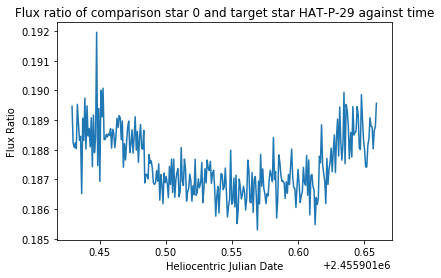

In [4]:
#We will now plot our first light-curve! Initially, I will only plot the first (n=0) light-curve, so as not to clutter the 
#notebook, but once I have normalised each flux ratio, I can plot all 10 on the same graph
plt.title('Flux ratio of comparison star 0 and target star HAT-P-29 against time') #Titles the graph
plt.ylabel('Flux Ratio') #Label the axis
plt.xlabel('Heliocentric Julian Date')
plt.plot(HJD1,FR0) #Actually plot the data
plt.show() #Outputs the graph into the notebook rather than a new window

We need to find a straight line fit to normalise the out-of-transit flux to unity. This will mean each of our flux ratios will be allowed on the same graph, but also allows us to obtain an average light-curve by stacking all of the individual light curves. We do this by using the polyfit function from the numpy module, which fits a polynomial of given degree to the date for us, returning the coefficients of the fitted polynomial, which we can then use to plot a fitted straight line onto our data. We want to use this fitted line to normalise our light-curve, so we will divide our real data by this fitted line. In order for this to make sense computationally, we will need to generate a new array of data points for each x-value (HJD) using the fitted line. In order to even work out the correct fitted line, we need to find out for what HJD ingress and egress occur. I decide these to be $0.48 * 2.456e6$ and $0.63 * 2.456e6$. We can also assume that this range is true for each comparison star.

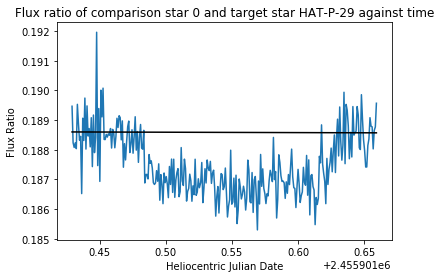

In [5]:
#We want to define a function that can generate a straight line fit for each of our flux ratios
t1 = 0.47 + 2.455901 * (10**6) #Time ingress begins
t2 = 0.64 + 2.455901 * (10**6) #Time egress begins 

def StraightLineFit(FR):
    index = np.where((HJD1<t1)|(HJD1>t2)) #Finds points out of transit
    OutOfTransitPointsY = FR[index] #Creates new array of out of trasit flux ratios
    OutOfTransitPointsX = HJD1[index] #Creates new array of out of transit HJD
    p = np.polyfit(OutOfTransitPointsX,OutOfTransitPointsY,1) #Finds coefficients for line y = mx + c 
    line = np.poly1d(p) #This converts the coefficients into a function we can use to generate an array of values that fit the line
    x = HJD1 #Our x-values are the HJDs
    y = line(x) #Our y-values fit the polynomial for each HJD
    return y
    
#test our function
y0 = StraightLineFit(FR0)  #generate our y-values 
#plot our graph and our new fitted line
plt.title('Flux ratio of comparison star 0 and target star HAT-P-29 against time') #Titles the graph
plt.ylabel('Flux Ratio') #Label the axis
plt.xlabel('Heliocentric Julian Date')
plt.plot(HJD1,FR0) #Actually plot the data
plt.plot(HJD1,y0,'k-') #Plot the new fitted line
plt.show() #Outputs the graph into the notebook rather than a new window

As you can see, the function works! We now have the means to generate a straight line fit to our data. We now simply need to divide by this new fitted line, and we will have our first normalised light curve! 

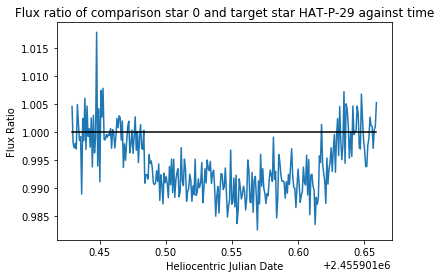

In [6]:
y0 = StraightLineFit(FR0) #Define the y-values for the fitted line 
y0n = FR0/y0 #Generate a new array of normalised points 
yn = y0/y0
#Plot the graph
plt.title('Flux ratio of comparison star 0 and target star HAT-P-29 against time') #Titles the graph
plt.ylabel('Flux Ratio') #Label the axis
plt.xlabel('Heliocentric Julian Date')
plt.plot(HJD1,y0n) #Actually plot the data
plt.plot(HJD1,yn,'k-') #Plot the fitted line
plt.show() #Outputs the graph into the notebook rather than a new window


Now that we have shown this code works for the 0th comparison star, let us apply it to all our comparison stars, and plot them all on the same graph:

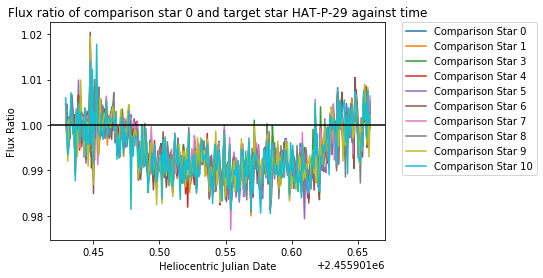

In [7]:
y0 = StraightLineFit(FR0) #Define the y-values for the fitted line 
y0n = FR0/y0 #Generate a new array of normalised points 
y1 = StraightLineFit(FR1) 
y1n = FR1/y1  
y3 = StraightLineFit(FR3) 
y3n = FR3/y3  
y4 = StraightLineFit(FR4) 
y4n = FR4/y4  
y5 = StraightLineFit(FR5) 
y5n = FR5/y5  
y6 = StraightLineFit(FR6) 
y6n = FR6/y6  
y7 = StraightLineFit(FR7) 
y7n = FR7/y7  
y8 = StraightLineFit(FR8) 
y8n = FR8/y8  
y9 = StraightLineFit(FR9) 
y9n = FR9/y9  
y10 = StraightLineFit(FR10) 
y10n = FR10/y10  


#Plot the graph
plt.title('Flux ratio of comparison star 0 and target star HAT-P-29 against time') #Titles the graph
plt.ylabel('Flux Ratio') #Label the axis
plt.xlabel('Heliocentric Julian Date')
plt.plot(HJD1,y0n, label='Comparison Star 0') #Actually plot the data
plt.plot(HJD1,y1n, label='Comparison Star 1')
plt.plot(HJD1,y3n, label='Comparison Star 3')
plt.plot(HJD1,y4n, label='Comparison Star 4')
plt.plot(HJD1,y5n, label='Comparison Star 5')
plt.plot(HJD1,y6n, label='Comparison Star 6')
plt.plot(HJD1,y7n, label='Comparison Star 7')
plt.plot(HJD1,y8n, label='Comparison Star 8')
plt.plot(HJD1,y9n, label='Comparison Star 9')
plt.plot(HJD1,y10n, label='Comparison Star 10')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axhline(y=1.0,color='k')

plt.show() #Outputs the graph into the notebook rather than a new window

In order the combine each of the light-curves into one, we must find a weighted average of the normalised flux ratios for each time-step. A weighted average is given by $$\overline{x} = \frac {\Sigma {\omega_i}{x_i}}{\Sigma {\omega_i}}$$ where $\omega_i$ is the statistical weight of each data point $x_i$. Our statistical weights are given by $$\omega_i = \frac{1}{\sigma^2}$$ where $\sigma$ is the signal noise. In our case, we have mag_err in our data file from photolight, but this is the error in the magnitude of the star. We're now using a flux ratio, which was worked out from  $$ \frac {N_t}{N_i} = 10 ^{(\frac {-\Delta m_i}{2.5})}$$ where $ \Delta m_i = m_{target} - m_{comp(i)}$. We must apply uncertainty propagation rules to determine $\sigma$ for our average equation.
We first find the differential magnitude, so the uncertainty of $\Delta m$ is: $$ \sigma_m = \sqrt ( (\Delta m_{target})^2 + (\Delta m_{comp(i)})^2) $$
The differential magnitude is divided by $2.5$ so: $$\sigma_c = \frac{\sigma_m}{2.5}$$ 
Finally, 10 is raised by this power, giving our uncertainty as: $$\sigma_{FR} = 2.303 * (\frac {N_t}{N_i} ) * \sigma_c   [1]$$ 

In [8]:
#We now need to work out the statistical weight of each data point for each star. The uncertainty for each Flux Ratio is given by
#the addition of the comparison star's uncertainty and the target star's uncertainty.

#First we must unpack all the errs
data2 = np.loadtxt('hat-p-29b-8px-mag_err.dat',unpack=True)

#Little bit more complicated than just doing int()+2, as not only are the mag_err offset by 2, they are also only every other 
#column. 
colerrt = (int(12)+2)*2 -1 #Target err. +2 deals with offset, *2 deals with every other column, -1 deals with python starting
                           #counting at 0

colerr0 = (int(0)+2)*2 -1 #Offset by 2, then every other column.remember python starts counting from 0
colerr1 = (int(1)+2)*2 -1
colerr3 = (int(3)+2)*2 -1
colerr4 = (int(4)+2)*2 -1
colerr5 = (int(5)+2)*2 -1
colerr6 = (int(6)+2)*2 -1
colerr7 = (int(7)+2)*2 -1
colerr8 = (int(8)+2)*2 -1
colerr9 = (int(9)+2)*2 -1
colerr10 = (int(10)+2)*2 -1

#Now we need to use the column numbers to unpack the errors into new arrays
errt = np.median(data2[colerrt])
err0 = np.median(data2[colerr0])
err1 = np.median(data2[colerr1])
err3 = np.median(data2[colerr3])
err4 = np.median(data2[colerr4])
err5 = np.median(data2[colerr5])
err6 = np.median(data2[colerr6])
err7 = np.median(data2[colerr7])
err8 = np.median(data2[colerr8])
err9 = np.median(data2[colerr9])
err10 = np.median(data2[colerr10])
print ('The error on star 0 is', err0)
print ('The error on our target star is', errt)

The error on star 0 is 0.00127
The error on our target star is 0.00268


In [9]:
#Start in new cell to save overloading previous 
#Now we need to work out the propagated error
#First we find the error in dm, which is simply the square root of the added squared errors
#i.e.
dmerr0 = np.sqrt ((errt**2)+(err0**2))
#Extend for all other comparison stars:
dmerr1 = np.sqrt ((errt**2)+(err1**2))
dmerr3 = np.sqrt ((errt**2)+(err3**2))
dmerr4 = np.sqrt ((errt**2)+(err4**2))
dmerr5 = np.sqrt ((errt**2)+(err5**2))
dmerr6 = np.sqrt ((errt**2)+(err6**2))
dmerr7 = np.sqrt ((errt**2)+(err7**2))
dmerr8 = np.sqrt ((errt**2)+(err8**2))
dmerr9 = np.sqrt ((errt**2)+(err9**2))
dmerr10 = np.sqrt ((errt**2)+(err10**2))

#Then we work out error after dividing by 2.5, and by raising ten to the power of this result
#We can combine these two steps to do them at the same time 
FRerr0= 2.303 * FR0 * (dmerr0/2.5)
FRerr1= 2.303 * FR1 * (dmerr1/2.5)
FRerr3= 2.303 * FR3 * (dmerr3/2.5)
FRerr4= 2.303 * FR4 * (dmerr4/2.5)
FRerr5= 2.303 * FR5 * (dmerr5/2.5)
FRerr6= 2.303 * FR6 * (dmerr6/2.5)
FRerr7= 2.303 * FR7 * (dmerr7/2.5)
FRerr8= 2.303 * FR8 * (dmerr8/2.5)
FRerr9= 2.303 * FR9 * (dmerr9/2.5)
FRerr10= 2.303 * FR10 * (dmerr10/2.5)

#Now we have the errors, we can work out the weights 
w0 = 1.0 / (FRerr0**2.)
w1 = 1.0 / (FRerr1**2.)
w3 = 1.0 / (FRerr3**2.)
w4 = 1.0 / (FRerr4**2.)
w5 = 1.0 / (FRerr5**2.)
w6 = 1.0 / (FRerr6**2.)
w7 = 1.0 / (FRerr7**2.)
w8 = 1.0 / (FRerr8**2.)
w9 = 1.0 / (FRerr9**2.)
w10 = 1.0 / (FRerr10**2.)

#print(w0)

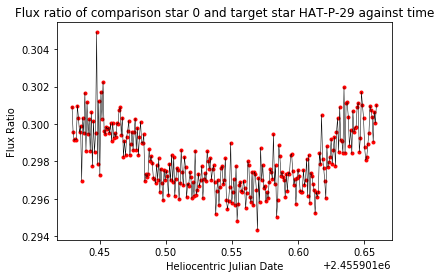

In [10]:
#Let us break down the average calculation into two steps 
#Top line 
#First find w_i * x_i for each star 
wx0 = w0 * FR0 
wx1 = w1 * FR1 
wx3 = w3 * FR3 
wx4 = w4 * FR4 
wx5 = w5 * FR5 
wx6 = w6 * FR6 
wx7 = w7 * FR7 
wx8 = w8 * FR8 
wx9 = w9 * FR9 
wx10 = w10 * FR10 
#then sum. Keeping it in array form ensures you do it element by element - i.e. for each time-point
xbartop = wx0 + wx1 + wx3 + wx4 + wx5 + wx6 + wx7 + wx8 + wx9 + wx10

#bottom line
#Want to find sum of w's for each time point 
xbarbottom = w0 + w1 + w3 + w4 + w5 + w6 + w7 + w8 + w9 + w10 

#Combine to find an array of average values
xbar = xbartop / xbarbottom

#plot graph 
plt.title('Flux ratio of comparison star 0 and target star HAT-P-29 against time') #Titles the graph
plt.ylabel('Flux Ratio') #Label the axis
plt.xlabel('Heliocentric Julian Date')
plt.plot(HJD1,xbar,'r.')
plt.plot(HJD1,xbar,'k-',linewidth=0.5)
plt.show()

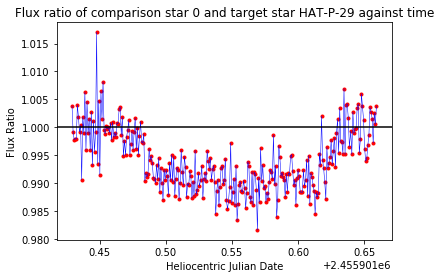

In [11]:
#Produced graph is unnormalised! To fix this we can simply renormalise this graph.
ybar = StraightLineFit(xbar)
ybarn = xbar/ybar

#plot graph 
plt.title('Flux ratio of comparison star 0 and target star HAT-P-29 against time') #Titles the graph
plt.ylabel('Flux Ratio') #Label the axis
plt.xlabel('Heliocentric Julian Date')
plt.plot(HJD1,ybarn,'r.')
plt.plot(HJD1,ybarn,'b-',linewidth=0.5)
plt.axhline(y=1.0,color='k')
plt.show()

## Interpreting the light curve 
The light-curve contains a lot of information about the stellar-planetary system. It can allow us to find a ratio of their radii, the period of the planets orbit, and even the stellar density. Some of this information can be found directly from the curve. For instance: $$ \frac{\Delta F}{F} = (\frac{R_p}{R_s})^2 = k^2 $$ shows us that using the fractional drop in flux (read from the graph), we can find the ratio of the radii (If we know e.g $R_s$ from some other method, we can then determine $R_p$). We can also measure the duration of the transit $t_{1,4}$, and the mid-transit time $t_c$.



From my normalised, weight-averaged light curve, I find that $\frac{\Delta F}{F} = 0.0125$ which gives $k = 0.1118$

I find that $t_{1,4} = 0.17 + 2.456 * 10^6$ HJD

I find that $t_C = 0.55 + 2.456 * 10^6$ HJD

We aim to find a value for the impact parameter, $b$, which is defined as: $$ b = \frac{a}{R_s} * \cos(i)$$, where $a$ is the semi-major axis, $R_s$ is the stellar radius and $i$ is the inclination of the system. In order to find b, we not only need $t_{1,4}$, but we also need $t_{1,2}$ and $t_{3,4}$, which are the times of ingress and egress respectively. Unfortunately, due to limb darkening, it is difficult to find this from our data. 

We can now (finally) create a light curve model to fit our data. We will first need data from an external source, in this exercise we use exoplanets.org [2]. We find that:

Orbital Period: $P = 5.723186 \pm 4.9*10^{(-5)}$ days

Orbital Eccentricity: $e = 0.095 \pm 0.047$

Longitude of periastron: $\omega = 169 \pm 30$ degrees

In [12]:
#We also want to save our averaged light curve as a two column data set, so we can export it to a modelling programme
tHJD1 = HJD1 - 2.455901e6
LC = np.column_stack((tHJD1,ybarn))
np.savetxt('finalmerge.dat',LC,delimiter=',')

Using the software on the ULO Linux computer cluster, I have fitted a model light-curve to my data, ensuring the minimisation of the RMS of the fit. A screenshot of the software and my fitted light curve is shown below:
![](Light_Curve_Model.jpg)

I now attempt to find some estimate on the uncertainty of the Planet-star ratio k, the shift, the impact parameter b and the scaled semi-major axis a/R. To do this, I will vary each parameter, and see how far I can change it before the fit becomes 'unacceptable'. To define what we mean by 'unacceptable', we write that: $$ {\sigma_{fit}}^2 = {\sigma_{min}}^2 * \frac{N-n+1}{N-n} $$ 
where $\sigma_{fit}$ is the new rms, $\sigma_{min}=0.003395$, $N=285$ and the number of parameters $n=11$. This is useful, as it shows us what rms value determines that the fit is 'unacceptable'. In the code cell below, I will work out what this is for us.


In [13]:
fit = np.sqrt ((0.003395**2)*((285-11+1)/(285-11)))
print ('The rms at which our plot becomes unacceptable is', fit)

The rms at which our plot becomes unacceptable is 0.00340118961316


Using this, I find the uncertainty in each is:

Shift: $\pm 0.002$ HJD

k: $\pm 0.02$

b: $\pm 0.015$

a/R: $\pm 0.2$


Returning once again to exoplanets.org [2], we find additional parameters, mainly of the star:

Reference Epoch for transit ephemeris $T_{transit,0} = 2455197.5754 \pm 0.00181$ days

Stellar mass $M = 1.207 \pm 0.046    M_{sun}$

Stellar radius $R = 1.22 \pm 0.133   R_{sun}$

Stellar Effective Temperature $T_{eff} = 6087 \pm 88$ K 

Velocity semi-amplitude of orbit $K = 78.3 \pm 5.9$ m/s.

The shift we found best reduced the rms of the model corresponds to the mid-transit time $t_C$. We found this shift to be =.55321, but this is a truncated date. The HJD of mid-transit is therefore $t_C = .55321 + 2.455901e6 = 2455901.55321$. We can also now work out the inclination of the system relative to the plane of the sky, using $b$ and $\frac{a}{R_s}$. Using $$b = \frac{a}{R_s} * cos(i)$$ we can easily find i. From k, we can determine the planetary radius $R_p$ using: $$ k = \frac {R_p}{R_s}$$ We can also determine the sem-major axis, a. 

In [14]:
#Calculate the HJD of mid-transit
Tc = .55321+2.455901e6
print ('The HJD of mid-transit is', Tc, '+/- 0.002')
#We want to compare this to the reference mid-transit time. We can find the number of cycles between the two, and if it is an
#integer, we can say our modelled mid-transit time is reasonably accurate
#Let E be the number of cycles since T0, then E = (Tc-T0)/P, where P is the period 
E = (Tc - 2455197.5754) / 5.723186
print ('The number of cycles passed since T0 is', E, '+/-0.003 as you can see, this is statistically \nsignificantly different from being an integer')
#As this is not quite an integer number of cycles, we can work out the deviation from the predicted ephemeris 
#and make a statement about whether this is expected or cause for concern
#calculate when we think the transit should be
Te = 2455197.5754 + (123*5.723186)
#Calculate the difference 
OC = Tc - Te 
print (OC)
#calculate the error on Te 
dTe = np.sqrt((0.002)**2 + (OC**2)*((4/9*10**-5)/5.723186))
print (dTe)

#Calculate the inclination 
ir = np.arccos( 0.81 / 7.4 ) #Gives result in radians 
i = np.degrees (ir) #converts to degrees
print ('The inclination of the system is',i,'degrees')


#Calculate the planetary radius 
Rp = 0.1018 * 1.22
print ('The planetary radius is', Rp,'+/- 0.0279 solar radii')


#Calculate the semi-major axis 
a = 7.40 * 1.22
print ('The semi-major axis is', a, '+/-1.01 solar radii')

The HJD of mid-transit is 2455901.55321 +/- 0.002
The number of cycles passed since T0 is 123.00453104268661 +/-0.003 as you can see, this is statistically 
significantly different from being an integer
0.025932000018656254
0.00200013055018
The inclination of the system is 83.7158432766 degrees
The planetary radius is 0.124196 +/- 0.0279 solar radii
The semi-major axis is 9.028 +/-1.01 solar radii


We now have all the information necessary to calculate the mean density of the planet, HAT-P-29b (Most of it coming from the light curve alone!). To determine the planetary density, we need to find it's mass, which can be found through: $$ K = \frac{2\pi a M_p \sin(i)}{(M_p + M_s)P \sqrt (1-e^2)}$$ where K is the semi-amplitude of the reflex radial velocity. Rearranging for $M_p$ gives: $$ M_p = \frac {M_s K P \sqrt (1 - e^2)}{2 \pi a \sin(i) - K P \sqrt(1-e^2)}$$
We can then simply find the density through: $$ \rho = \frac {M_p}{V_p} = \frac{3 M_p}{4 \pi {R_p}^3}$$ assuming of course that the planet is spherical. 

In [15]:
#Find Mp, let us first define our variables 
#i is defined above
#a is also defined above 
e = 0.095
K = 0.009724 #I have converted from m/s to R_sun / day 
Ms = 1.207 #In solar masses
P = 5.723

#Now we can calculate Mp
Mp = (Ms*K*P*(np.sqrt(1-(e**2)))) / ((2*np.pi*a*np.sin(ir))-(K*P*(np.sqrt(1-(e**2)))))
print ('The mass of our planet is', Mp, 'in solar masses')
print ('The mass of our planet is', (Mp*333060), '+/-47.4 in Earth masses')

#Now we can calculate the density 
p = (3*Mp)/(4*np.pi*(Rp**3)) #lower case p for density, upper case P for period
print ('The density of our planet is', p, 'in Solar mass per Solar Radius cubed')
print ('The desnity of our planet is', ((p * 1.99 *10**33)/((6.957*10**10)**3)),'in g/cm^3')

The mass of our planet is 0.00118708071015 in solar masses
The mass of our planet is 395.369101323 +/-47.4 in Earth masses
The density of our planet is 0.147934276651 in Solar mass per Solar Radius cubed
The desnity of our planet is 0.8742907404750536 in g/cm^3


#### Some extra calculations 
From the ratio of stellar radius and semi-major axis, the effective temperature of the star and the thermal properties of the planet (Albedo etc.), it is possible to use the transit light-curve to estimate the day-time temperature of the planet. From the luminosity equation of the star, and assuming that the planet is in equilibrium with the star (and both are black-bodies) we can write: $${T_{day}}^4 = \frac{1}{2} (1 - P) (1 - A) (\frac{R_*}{a})^2 {T_{eff}}^4$$
Where: $P$ is the fraction of the absorbed energy transported to night-side of planet, $A$ is the bond Albedo of the planet, and $T_{eff}$ is the effective temperature of the star. Once again using information from exoplanets.org [2], I find the effective temperature of the star to be: 

$T_{eff} = 6087 \pm 88 K$

The density of the planet is somewhat similar to that of Jupiter, so for the point of this exercise I wil assume HAT-P-29-b has the some bond albedo as Jupiter, which I have found to be $A = 0.343$ [3] I will also assume the planet efficiently delivers heat energy to the night-side, giving $P=0.5$. 

In [16]:
#Set our constants
Pn = 0.5 #Pn to distinguish from P(eriod)
A = 0.343 #Capital A, not semi-major axis a 
Teff = 6087

#Calculate temperature
Tday = (0.5*(1-Pn)*(1-A)*((1/7.40)**2)*(Teff**4))**0.25
print ('The day side of the planet is at approximately', Tday,'+/- 18.5 K')

The day side of the planet is at approximately 1424.5043718635122 +/- 18.5 K


Using this approximation for the day temperature, we can estimate the depth of a secondary eclipse at different temperatures. The secondary eclipse occurs when the star eclipses the planet, and the dip is seen as the difference between the stellar flux, and the combined stellar and planetary flux. We can write a ratio of this flux difference to the stellar flux (giving the flux drop on a normalised transit curve) as: 
$$ \frac{\Delta F_{sec}}{F_{star}} \approx \frac{f_{day,\lambda}}{f_{star,\lambda}} \approx \frac{B_{\lambda}(T_{day})}{B_{\lambda}(T_{eff})} ( \frac {R_p}{R_{star}} )^2 $$
Where $f$ represents the source function at$\lambda$ and $B_{\lambda}(T)$ represents the Planck function at some temperature $T$. 
To show that this formula works, let us use it to estimate the depth of the seconday eclipse at $\lambda = 16 \mu m$, which lies inside the Infra-red. At longer wavelengths, such as $16\mu m$, it is often easier to use the Rayleigh-Jeans law approximation to the Planck Function, which is written as: 
$$ B_{\lambda}(T) = \frac{2ck_bT}{\lambda^4} $$ where $k_b$ is the Boltzmann constant, found to be $k_b = 1.38064774 * 10 ^{-23} \pm 1.71 * 10^{-29} J K^{-1}$ [4].

If we want to make our lives easier (as we often do), we can sub the Rayleigh-Jeans approximation into our above equation, to see if any of the terms cancel, and as it happens, they do, giving us: 
$$ \frac {\Delta F_{sec}}{F_{star}} \approx \frac{T_{day}}{T_{eff}} (\frac{R_p}{R_{star}})^2$$

In [20]:
FRsec = (Tday/Teff) * ((Rp/1.22)**2)
print ('The drop in flux of the secondary eclipse is', FRsec,'+/- 0.0005 per Stellar Flux')

The drop in flux of the secondary eclipse is 0.0024252473610433425 +/- 0.0005 per Stellar Flux


## Conclusions and Additional thoughts 

#### Why have we used HJD in this time-series study, rather than the standard JD?
Julian Date is an absolute day count calendar, that simply measures the number of days since $January 1^{st} 4713 BC$. We use this for most astronomy, as it removes issues such as the variability of months (e.g. $1^{st}$ February to $1^{st}$ March is shorter than $1^{st}$ March to $1^{st}$ April.) This is fine for standard astronomy, such as spectroscopy, where we take all observations on a single night. However with time-sensitive observations, like exoplanets transits where we want confirm the consistency of the planets orbit, this will not do. If we were to make 2 observations, one on the $1^{st}$ January and one on the $1^{st}$ June, 6 months will have passed between these two dates, and the Earth will have moved 2 AU (relative to the star being observed). The light coming from this star will arrive at a different time at each point, even if the exoplanet has a regular orbit. It is for this reason we use a Heliocentric Julian Date. HJD takes into account the light-travel time of a paticular event to be observed at the center of the Sun. This will account for any difference in orbit (seeing as we orbit around the Sun, even though we move relative to it, it doesn't move relative to us). To be strictly correct, we should adjust to mimic observations from the common center of mass of the Sun and the Earth (and the 7 other planets, asteroid belt, Kuiper belt, etc...), however this can often prove more complicated than useful. 

### References 
[1] - S. V. Bramer. (1996. May 15th). $\textit{Error Analysis}$ [Online] Available at: http://science.widener.edu/svb/stats/error.html


[2] - E. Han, et al. (2014. Sept). $\textit{Exoplanet Orbit Database}$ [Online] Available at: http://www.exoplanets.org/


[3] - Dr. D. R. Williams. (2017, June 30th). $\textit{Jupiter Fact Sheet}$ [Online] Available at: https://nssdc.gsfc.nasa.gov/planetary/factsheet/jupiterfact.html

[4] -  L. Pitre, F. Sparasci, D. Truong, A. Guilou, L. Risegari, ME. Himbert, Measurement of the Boltzmann constant $k_b$ using a quasi-spherical acoustic resonator, $\textit{International Journal of Thermophysics}$, vol. 32, pp. 1825-1886, July 2011.